
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
         # Calculate mean and std for each column
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    

    
    def transform(self, X):
         return (X - self.mean) / self.std
    
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    


In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for i in range(self.epochs):
            # linear prediction
            y_pred = np.dot(X, self.weights) + self.bias
            




            # MSE loss , L2 
            error = y_pred - y
            mse_loss = (1 / (2 * n_samples)) * np.sum(error**2)
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights**2)
            self.loss_history.append(mse_loss + l2_loss)
            
            # Gradients
            dw = (1 / n_samples) * (np.dot(X.T, error) + self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(error)
            



            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    


    
    



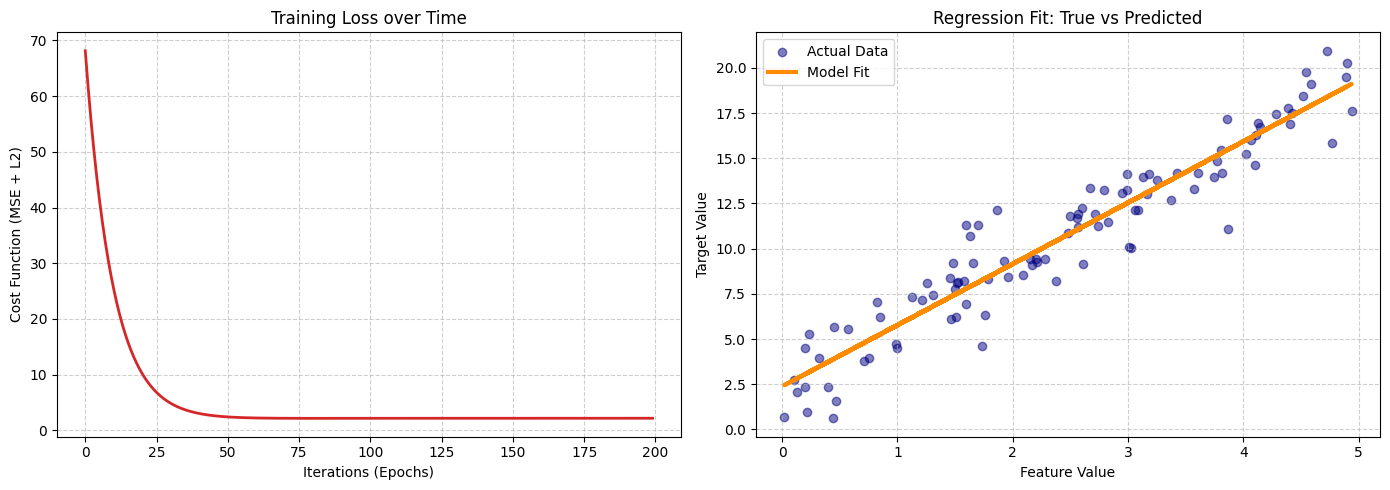

In [4]:
#Plotting

# Creating a toy dataset
np.random.seed(10)
X_raw = 5 * np.random.rand(100, 1)
y_raw = 2 + 3.5 * X_raw.flatten() + np.random.randn(100) * 1.5

# Step 1: Standardize features manually
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_raw)

# Step 2: Initialize and train the regression model

model = LinearRegressionManual(lr=0.05, epochs=200, l2_lambda=0.1)
model.fit(X_scaled, y_raw)
predictions = model.predict(X_scaled)

# Step 3: Plotting the results as requested
plt.figure(figsize=(14, 5))

# Plotting Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='tab:red', linewidth=2)
plt.title('Training Loss over Time')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Cost Function (MSE + L2)')
plt.grid(True, linestyle='--', alpha=0.6)

# Plotting True vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(X_raw, y_raw, color='navy', alpha=0.5, label='Actual Data')
plt.plot(X_raw, predictions, color='darkorange', label='Model Fit', linewidth=3)
plt.title('Regression Fit: True vs Predicted')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [5]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [6]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []






    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)


            # Adding epsilon to avoid log(0)
            epsilon = 1e-15
            loss = - (1 / n_samples) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
            reg_term = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            self.loss_history.append(loss + reg_term)
            
            # Gradients for Logistic
            dw = (1 / n_samples) * (np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db





    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    


    

    def predict(self, X):
        probs = self.predict_proba(X)
        # Use 0.5 as threshold
        return [1 if i > 0.5 else 0 for i in probs]


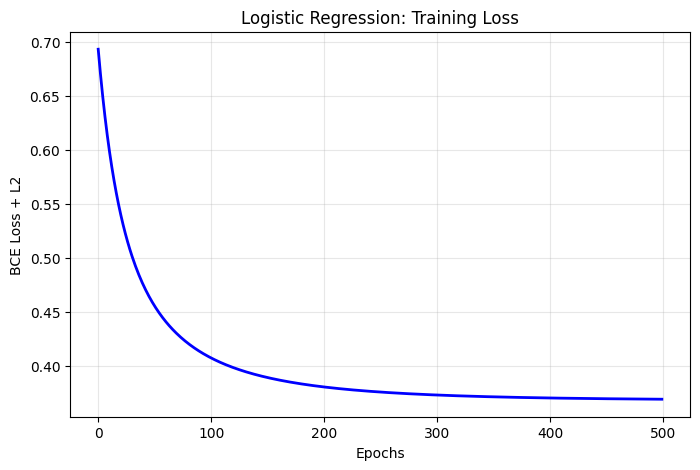

Final Training Accuracy: 84.00%


In [7]:
# Execution and Reporting

# Createing binary classification data
from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                     n_clusters_per_class=1, random_state=42)




scaler = StandardScalerManual()
X_std = scaler.fit_transform(X_data)



log_model = LogisticRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
log_model.fit(X_std, y_data)

# Predictions and Accuracy
y_preds = log_model.predict(X_std)
accuracy = np.mean(y_preds == y_data) * 100

# Plotting the Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(log_model.loss_history, color='blue', linewidth=2)
plt.title('Logistic Regression: Training Loss')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss + L2')
plt.grid(alpha=0.3)
plt.show()

print(f"Final Training Accuracy: {accuracy:.2f}%")


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [8]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass


In [9]:
#here i am using sklearn because you said above

from sklearn.cluster import KMeans




def kmeans_matrix(M, k, max_iters=100):
    rows, cols = M.shape


    
    # Flatten matrix to cluster individual element values
    # Reshape to (-1, 1) because sklearn expects 2D array
    elements_flat = M.flatten().reshape(-1, 1)





    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10)
    labels = kmeans.fit_predict(elements_flat)
    centroids = kmeans.cluster_centers_.flatten()

    


    assignment_table = labels.reshape(rows, cols)
    


    # Build the cookbook
    cookbook = {i: [] for i in range(k)}
    for r in range(rows):
        for c in range(cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))
            
    return assignment_table, cookbook, centroids


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
